Our goal is to construct and train an artificial neural network on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database which contains 60,000 images for training and 10,000 test images. 

# 1. Data Collection 

The MNIST dataset contains 60,000 small square 28×28 pixel grayscale training images of handwritten digits from 0 to 9 and 10,000 images for testing. So, the MNIST dataset has 10 different classes.



 It consists of 28x28 pixel images of handwritten digits, such  as 

  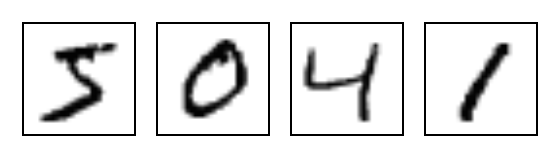


      


# 2. Data preparation and environment setup :

First, some software needs to be loaded into the Python environment. We will use the Keras Python API with TensorFlow as the backend.

In [ ]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

**Loading Training Data**

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python. 

In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Here, X_train is the 60,000 images of 28**28 matrix where each element of the matrix carries pixel value and Y_train is the level of X_train. 
Y_train = {0,1,2,3,4,5,6,7,8,9}
X_test is contained with 10,000 images of 28*28 matrix where each element of the matrix carries pixel value
We will test our hypothesis with Y_test. 



Using matplotlib, we can plot some sample images from the training set directly into this Jupyter Notebook.

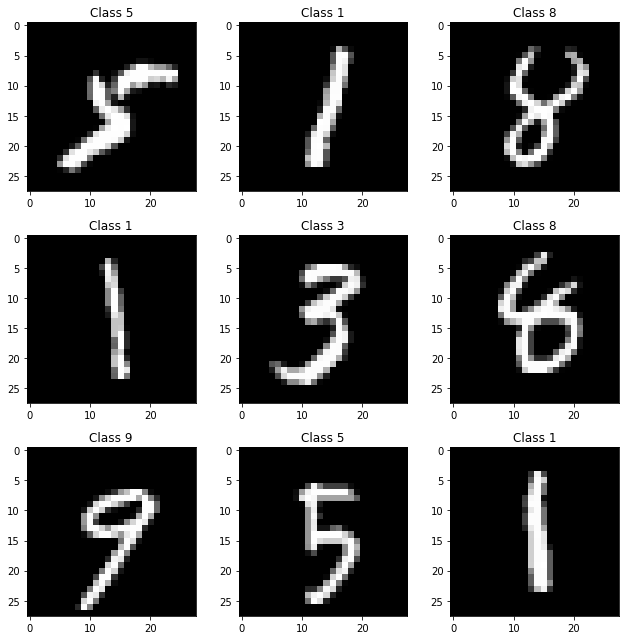

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

Let's examine a single digit a little closer, and print out the array representing the last digit.

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[num])

0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0   24  212  148    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0   25  209  173   26    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0  133  247   68    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0   65  246  134    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0   29  216  212   28    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    2  168  254   85    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0  111  254  173    2    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0

Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white. This what we call a single-channel pixel. It's called monochrome.





**Formatting the input data layer**

Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.

Each image needs to be then reshaped (or flattened) into a vector (row flattening). We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.

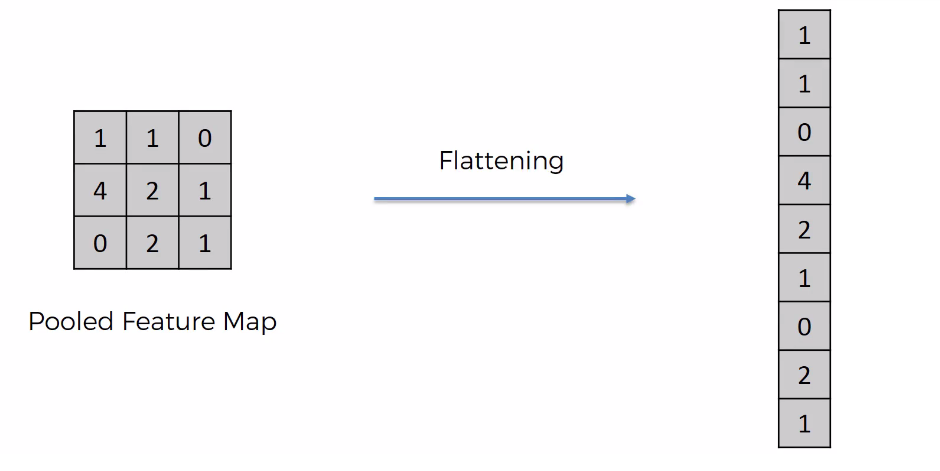

In [ ]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


We then modify our classes (unique digits) to be in the one-hot format, i.e.

0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]

1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]

2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.

If the final output of our network is very close to one of these classes, then it is most likely that class. For example, if the final output is:

[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]

then it is most probable that the image is that of the digit 1.

In [ ]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

**Building a 3-layer fully connected network (FCN)**

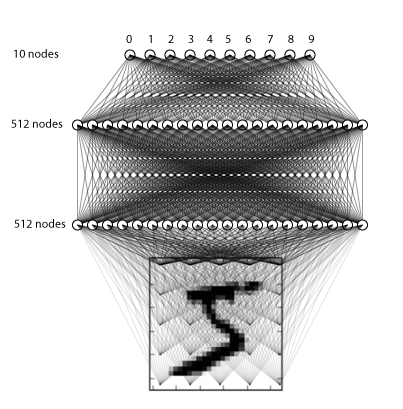

# 3. Model Design and Implementation

In [ ]:
# The Sequential model is a linear stack of layers and is very common.

model = Sequential()

In [ ]:
# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it.

model.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

In [ ]:

# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.

model.add(Activation('relu'))

***f(x)=max(0,x)***

In [ ]:
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.
model.add(Dropout(0.2))


In [ ]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [ ]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).
model.add(Dense(10))

In [ ]:
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))

In [ ]:
# Summarize the built model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

**Compiling the model**


When compiing a model, Keras asks you to specify your loss function and your optimizer. The loss function we'll use here is called categorical cross-entropy.

Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution.

The optimizer helps determine how quickly the model learns through gradient descent. The rate at which descends a gradient is called the learning rate.

In [ ]:
# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# 4. Output generation 
**Train the model**

The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

So a good batch size may take some trial and error to find!

In [ ]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 7s 14ms/step - loss: 0.2497 - accuracy: 0.9238
Epoch 2/5
469/469 [==============================] - 7s 14ms/step - loss: 0.1001 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0718 - accuracy: 0.9779
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0561 - accuracy: 0.9818
Epoch 5/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0440 - accuracy: 0.9856


# 5. Performance

The two numbers, in order, represent the value of the loss function of the network on the training set, and the overall accuracy of the network on the training data.

**Evaluate Model's Accuracy on Test Data**

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0632 - accuracy: 0.9798
Test score: 0.06323932856321335
Test accuracy: 0.9797999858856201


**Inspecting the output**

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


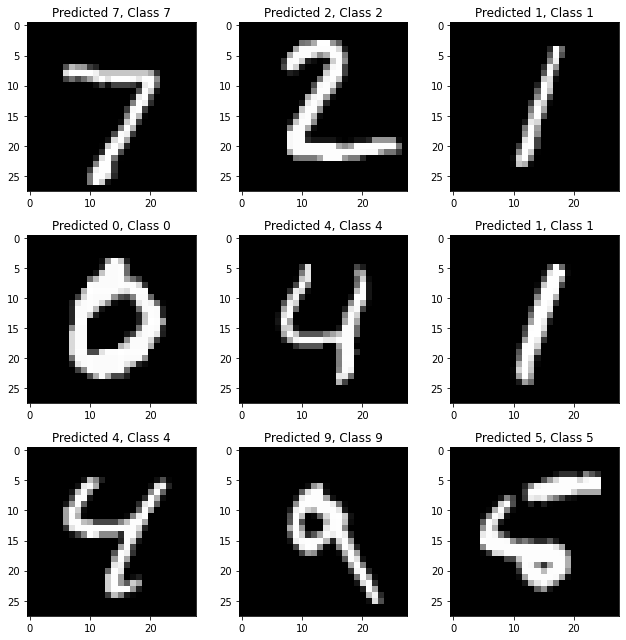

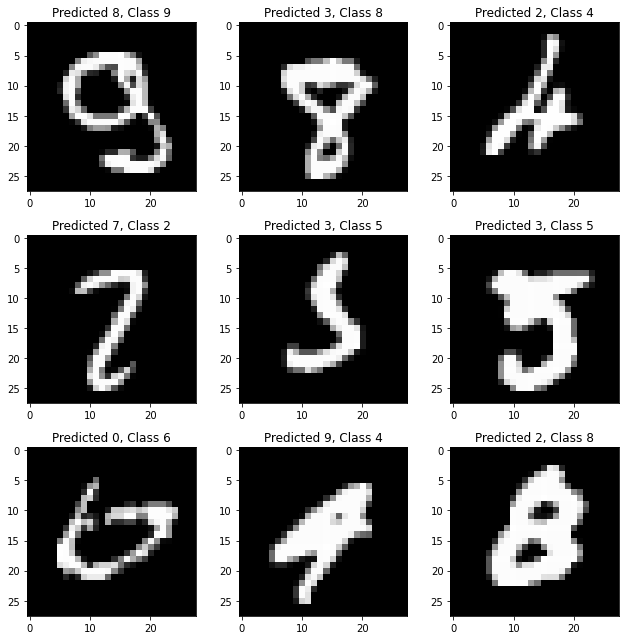

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

# 2nd Approach
Building a Convolutional Neural Network

# 1. Data Collection

In [ ]:
# import some additional tools

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization import BatchNormalization

In [ ]:
# Reload the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. Preprocess the data

The dimension of the training data is (60000, 28, 28). CNN accepts four dimensions. So we need to reshape the images to have dimensions (samples*width*height*pixels) 

We need to normalize inputs from 0–255 to 0–1 as to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of value. This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value

In [ ]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric. The technique to achieve this is called One-Hot Code.

In [ ]:
# one-hot format classes

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# 3. Create the model

Next, we need to define a baseline Convolutional Neural Network (CNN) model.

In simpler words, CNN is an artificial neural network that specializes in picking out or detect patterns and make sense of them. Thus, CNN has been most useful for image classification. A CNN model has various types of filters of different sizes and numbers. These filters are essentially what helps us in detecting the pattern.

In [ ]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

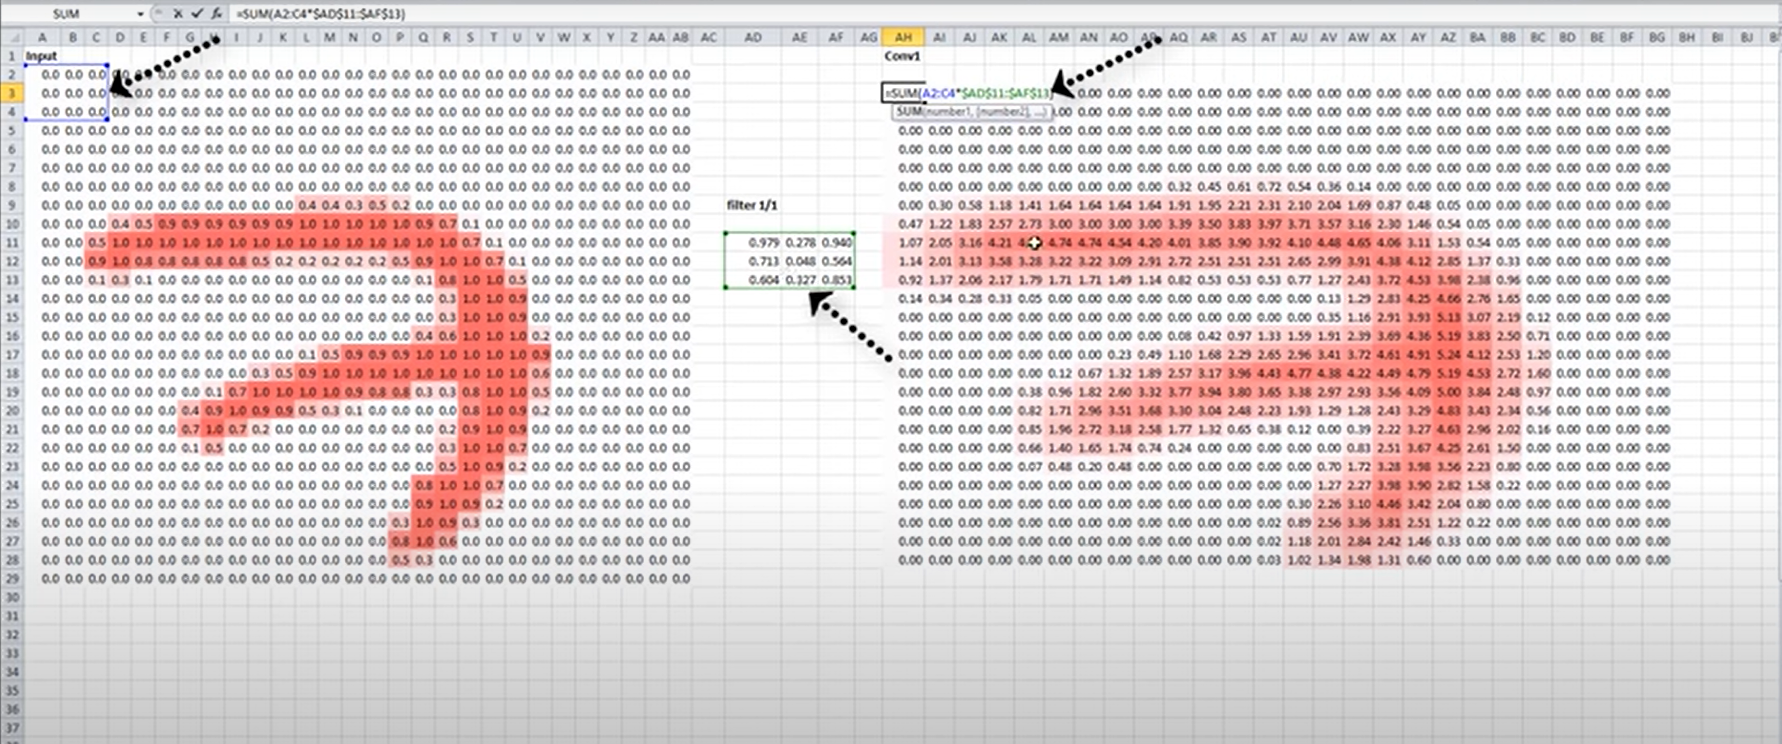

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)       

# 4. Output generation

**Train the model**

In [ ]:
# we'll use the same optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a built-in feature to do automatic augmentation

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [ ]:
# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch

# Before the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [ ]:
# We can now train our model which is fed data by our batch loader
# Steps per epoch should always be total size of the set divided by the batch size

# SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)

model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
468/468 [==============================] - 174s 372ms/step - loss: 0.1293 - accuracy: 0.9599 - val_loss: 0.0625 - val_accuracy: 0.9820
Epoch 2/5
468/468 [==============================] - 174s 372ms/step - loss: 0.0480 - accuracy: 0.9852 - val_loss: 0.0320 - val_accuracy: 0.9891
Epoch 3/5
468/468 [==============================] - 174s 372ms/step - loss: 0.0396 - accuracy: 0.9873 - val_loss: 0.0432 - val_accuracy: 0.9848
Epoch 4/5
468/468 [==============================] - 174s 371ms/step - loss: 0.0330 - accuracy: 0.9899 - val_loss: 0.0795 - val_accuracy: 0.9737
Epoch 5/5
468/468 [==============================] - 173s 369ms/step - loss: 0.0298 - accuracy: 0.9907 - val_loss: 0.0643 - val_accuracy: 0.9813


# 5. Performance

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 8s 25ms/step - loss: 0.0376 - accuracy: 0.9882
Test score: 0.03755713626742363
Test accuracy: 0.9882000088691711
